In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# đọc file
csv1 = pd.read_csv('AdvWorksCusts.csv')
csv2 = pd.read_csv('AW_AveMonthSpend.csv')
csv3 = pd.read_csv('AW_BikeBuyer.csv')

In [29]:
# kiểm tra thông tin các bảng csv
def check_information_dataframe(name, csv) :
    print (name + "\n" + str(csv.dtypes))
    print ("-" * 60)
check_information_dataframe('AdvWorksCusts.csv', csv1)
check_information_dataframe('AW_AveMonthSpend.csv', csv2)
check_information_dataframe('AW_BikeBuyer.csv', csv3)

AdvWorksCusts.csv
CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
dtype: object
------------------------------------------------------------
AW_AveMonthSpend.csv
CustomerID       int64
AveMonthSpend    int64
dtype: object
------------------------------------------------------------
AW_BikeBuyer.csv
CustomerID    int64
BikeBuyer     i

In [30]:
# Hiển thị sơ lược dữ liệu của các bảng 1
print (csv1['CustomerID'].count())
print (csv1['CustomerID'].nunique())
csv1.head()

16519
16404


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [31]:
# Hiển thị sơ lược dữ liệu bảng 2
print (csv2['CustomerID'].count())
print (csv2['CustomerID'].nunique())
csv2.head()

16519
16404


,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [32]:
# Hiển thị sơ lược dữ liệu bảng 3
print (csv3['CustomerID'].count())
print (csv3['CustomerID'].nunique())
csv3.head()

16519
16404


,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


In [33]:
# Xóa các dòng trùng nhau trong dataframe
csv1 = csv1.drop_duplicates('CustomerID', 'last')
csv2 = csv2.drop_duplicates('CustomerID', 'last')
csv3 = csv3.drop_duplicates('CustomerID', 'last')

# Nối các dataframe lại thành 1 bảng theo trường CustomerID
csv = csv1.merge(csv2, on = 'CustomerID')
csv = csv.merge(csv3, on = 'CustomerID')
csv.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1


In [34]:
# Tìm các đối tượng bị thiếu
def find_missing_value(csv, missing_char):
    for col in csv.columns:
        if csv[col].dtype == object:
            count = [1 for x in csv[col] if x is missing_char]
            print (col + ' ' + str(np.sum(count)))
find_missing_value(csv, np.nan)

Title 16316
FirstName 0.0
MiddleName 6951
LastName 0.0
Suffix 16402
AddressLine1 0.0
AddressLine2 16131
City 0.0
StateProvinceName 0.0
CountryRegionName 0.0
PostalCode 0.0
PhoneNumber 0.0
BirthDate 0.0
Education 0.0
Occupation 0.0
Gender 0.0
MaritalStatus 0.0


In [35]:
# Các trường MiddleName, Suffix, AddressLine2, Title có nhiều giá trị nan nên sẽ bị xóa bỏ
csv = csv.drop(['MiddleName','Suffix','AddressLine2','Title'], axis=1)
find_missing_value(csv, np.nan)

FirstName 0.0
LastName 0.0
AddressLine1 0.0
City 0.0
StateProvinceName 0.0
CountryRegionName 0.0
PostalCode 0.0
PhoneNumber 0.0
BirthDate 0.0
Education 0.0
Occupation 0.0
Gender 0.0
MaritalStatus 0.0


Sum : 1187502
Max : 176
Min : 22
Median : 68.0
Mean : 72.39100219458669
Variance : 743.6032743187022
Standar : 27.269090089673


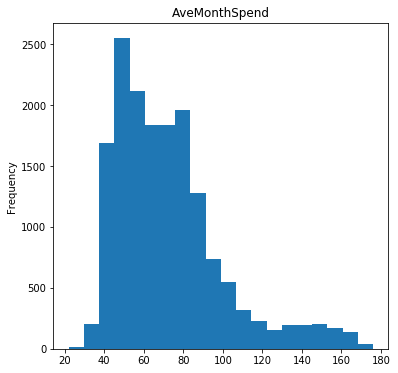

In [77]:
# Với các giá trị dạng số, ta tiến hành tính các số liệu mang ý nghĩa miêu tả toàn bộ bảng số liệu ấy.
# Đồng thời lựa chọn các biểu đồ phù hợp để miêu tả nó
def get_info_numeric_columns(col):
    print ('Sum : ' + str(np.sum(col)))
    print ('Max : ' + str(np.max(col)))
    print ('Min : ' + str(np.min(col)))
    print ('Median : ' + str(np.median(col)) )
    print ('Mean : ' + str(np.mean(col)))
    print ('Variance : ' + str(np.var(col)))
    print ('Standar : ' + str(np.std(col)))
get_info_numeric_columns(csv['AveMonthSpend'])

def plot_hist(csv, col_names, bins):
    for col, bin in zip(col_names, bins) :
        fig = plt.figure(figsize = (6,6))
        ax = fig.gca()
        csv[col].plot.hist(bins = bin)
        plt.title(col)
        plt.show()
plot_hist (csv, ['AveMonthSpend'],[20])


0    10949
1     5455
Name: BikeBuyer, dtype: int64


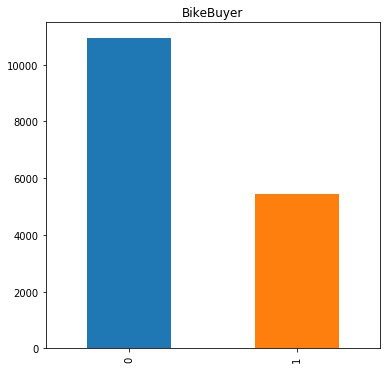

In [78]:
def get_info_classification_value(col):
    print (col.value_counts())
def plot_bars(csv, col_names):
    for col in col_names:
        fig = plt.figure(figsize = (6,6)) # Định nghĩa vùng vẽ biểu đồ 
        ax = fig.gca()                    # Định nghĩa các cạnh 
        counts = csv[col].value_counts()
        counts.plot.bar(ax = ax)
        plt.title(col)
        plt.show()
        
get_info_classification_value(csv['BikeBuyer'])
plot_bars(csv, ['BikeBuyer'])

In [190]:
# Sắp xếp thu nhập trung bình của các nghề trong năm
tmp = csv[['YearlyIncome','Occupation']].groupby('Occupation').mean().sort_values('YearlyIncome')
print (tmp)

                 YearlyIncome
Occupation                   
Manual           23489.205730
Clerical         48682.166731
Skilled Manual   69411.253839
Professional    100382.030679
Management      121721.869757


In [191]:
# Tính số thu nhập trung bình của các nhóm tuổi 
year_of_birth = [x[:4] for x in csv['BirthDate']]
csv['Age'] = [1998 - int(x) for x in year_of_birth]

tmp = []
for x in csv['Age']:
    if x < 25: tmp += ['<25']
    elif x >= 25 and x < 45: tmp += ['25,45']
    elif x >= 45 and x < 55: tmp += ['45,55']
    else: tmp += ['>=55']
csv['Age'] = tmp

tmp = csv[['Gender','Age','AveMonthSpend']].groupby(['Gender','Age']).sum().sort_values('AveMonthSpend')
print (tmp)

              AveMonthSpend
Gender Age                 
F      >=55           29258
M      >=55           45626
F      <25            56893
       45,55          76373
M      <25            88316
       45,55         117316
F      25,45         296895
M      25,45         476825


In [195]:
# Tính sự tương quan giữa các đặc điểm của các trường đối với lợi nhuận của họ cho công ty
columns = ['Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome']
def groupby_avemonthspend(col):
    tmp = csv[[col, 'AveMonthSpend']].groupby(col).median().sort_values('AveMonthSpend')
    print (col)
    print (tmp)
    print ('-' * 30)
for col in columns:
    groupby_avemonthspend(col)

Gender
        AveMonthSpend
Gender               
F                  52
M                  79
------------------------------
MaritalStatus
               AveMonthSpend
MaritalStatus               
S                         62
M                         74
------------------------------
HomeOwnerFlag
               AveMonthSpend
HomeOwnerFlag               
0                         63
1                         71
------------------------------
NumberCarsOwned
                 AveMonthSpend
NumberCarsOwned               
1                           63
2                           64
0                           65
3                           92
4                          100
------------------------------
NumberChildrenAtHome
                      AveMonthSpend
NumberChildrenAtHome               
0                                57
1                                68
2                                79
3                                90
4                               101
5              

In [209]:
# Tương quan giữa đặc điểm của từng người và việc đã mua xe đạp chưa
print(csv.dtypes)
tmp = csv[['YearlyIncome','BikeBuyer']].groupby('BikeBuyer').median()
tmp = csv[['NumberCarsOwned','BikeBuyer']].groupby('BikeBuyer').median()
tmp = csv[['Occupation','BikeBuyer']].groupby('Occupation').sum()
tmp = csv[['Gender','BikeBuyer']].groupby('Gender').sum()
tmp = csv[['MaritalStatus','BikeBuyer']].groupby('MaritalStatus').sum()
print (tmp)

CustomerID               int64
FirstName               object
LastName                object
AddressLine1            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
Age                     object
dtype: object
               BikeBuyer
MaritalStatus           
M                   2199
S                   3256
